In [1]:
import matplotlib.pyplot as plt
import os, glob, cv2

# pred_result_dir = '/home/chadrick/prj/kaggle/hubmap/predict/testoutput/eval/210314_141913'
pred_result_dir = 'predict/testoutput/eval/210314_141913'

files = glob.glob(os.path.join(pred_result_dir, '*.png'))

print(f'total valid images: {len(files)}')

total valid images: 96


['predict/testoutput/eval/210314_141913/3107.png', 'predict/testoutput/eval/210314_141913/17348.png', 'predict/testoutput/eval/210314_141913/23406.png', 'predict/testoutput/eval/210314_141913/24361.png', 'predict/testoutput/eval/210314_141913/16849.png', 'predict/testoutput/eval/210314_141913/4963.png', 'predict/testoutput/eval/210314_141913/1164.png', 'predict/testoutput/eval/210314_141913/24400.png', 'predict/testoutput/eval/210314_141913/13703.png', 'predict/testoutput/eval/210314_141913/23066.png']


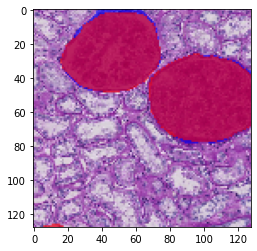

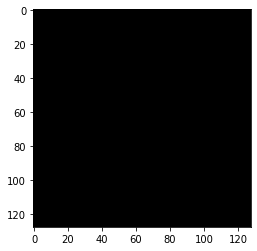

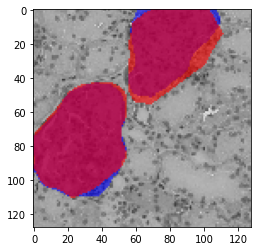

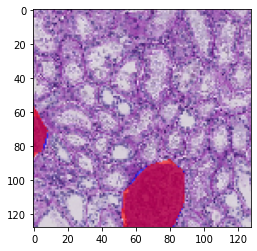

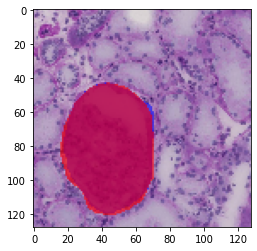

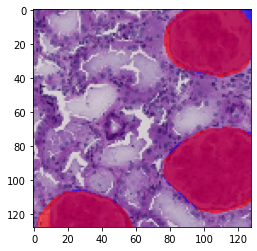

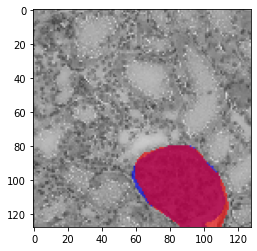

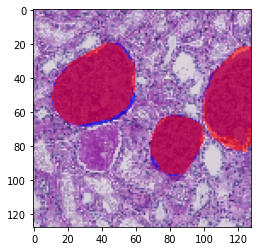

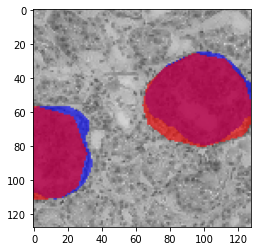

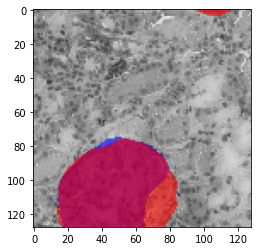

In [2]:
sel_files = files[:10]

print(sel_files)

for f in sel_files:
    img = cv2.imread(f)
    plt.figure()
    plt.imshow(img)

# show some examples of predicted slices
# red: predicted area, blue: gt area

In [3]:
 # eval mean dice values
from predict.eval import main
import yaml, numpy as np


eval_config_file = '/home/chadrick/prj/kaggle/hubmap/predict/config/eval_config/210314_0.yaml'

with open(eval_config_file, 'r') as fd:
    config = yaml.load(fd, Loader=yaml.FullLoader)
    

result = main(config)
# print(result)

100%|██████████| 24/24 [00:02<00:00, 11.46it/s]

mean_dice: 0.7183863753810529


([<matplotlib.axis.XTick at 0x7ff37dbfe9a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

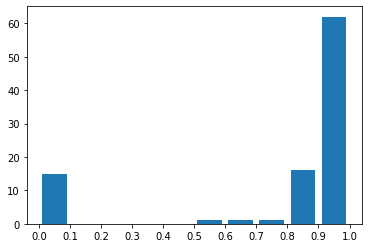

In [4]:
gap = 0.1
bins = np.arange(0, 1. + gap/2, gap)

# print(bins)

dice_result = result['results']

dice_val_list = list(dice_result.values())

# print(dice_val_list)

hist, _ = np.histogram(np.array(dice_val_list), bins=bins)

figure = plt.figure()

x_arr = bins[:-1] + gap/2


plt.bar(x_arr, hist, width=0.8* gap)
plt.xticks(bins)
# plt.set_xticks(x_arr)